In [73]:
import pandas as pd
from matplotlib import pyplot as plt

#### Use Pandas read_csv to load the us-counties.csv file.

The columns of the CSV file are:

date   - The date as a string (don't forget to convert this to a `pd.datetime`)

county - The name of the county

state  - The name of the state

fips   - The fips code of the county (the first two digits represent the state, the last three, the county)

cases  - The cumulative number of cases at the date in the county

deaths - The cumulative number of deaths in at the date in the county

In [81]:
df = pd.read_csv('us-counties.csv')
df['date'] = pd.to_datetime(df['date'])
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


#### Question 1: Produce a DataFrame that contains only the data for the top 10 Counties by total number of cases

In [103]:
df1 = df.groupby(['county', 'state', 'fips'])[['cases', 'deaths']].sum().reset_index()
df1_res = df1.sort_values('cases', ascending = False)[:10]
df1_res

,county,state,fips,cases,deaths
1754,Los Angeles,California,6037.0,402018724,7559005.0
650,Cook,Illinois,17031.0,185185227,4170591.0
1828,Maricopa,Arizona,4013.0,181088610,3259712.0
1956,Miami-Dade,Florida,12086.0,167473662,2259380.0
1241,Harris,Texas,48201.0,135632585,2104370.0
736,Dallas,Texas,48113.0,101072462,1279004.0
2487,Riverside,California,6065.0,96055232,1401523.0
2557,San Bernardino,California,6071.0,94684223,1333680.0
2558,San Diego,California,6073.0,89439358,1128416.0
2188,Orange,California,6059.0,86402638,1486760.0


####  Question 2: Produce a DataFrame that contains only the data for the top 5 states by total number of cases

In [104]:
df2 = df.groupby(['state'])[['cases', 'deaths']].sum().reset_index()
df2_res = df2.sort_values('cases', ascending = False)[:5]
df2_res

,state,cases,deaths
5,California,1223642710,19057819.0
47,Texas,972885461,16552759.0
10,Florida,783197063,12598577.0
34,New York,660821836,22191740.0
15,Illinois,450015205,8921337.0


#### Question 3: Calculate the incidence (the number of new cases per day... i.e. the difference between the cases on a day - the cases on a previous day) for the top 10 Counties.

In [196]:
df_top_counties = df[df['fips'].isin(df1_res['fips'])]

In [211]:
df3_group = df_top_counties.groupby(['county', 'state', 'fips', 'date']).sum()
df3_increments = df3_group.diff().reset_index()
df3 = df3_increments.rename(columns = {'cases':'incident'})
df3 = df3.groupby(['county', 'state', 'fips', 'date']).max()
df3 = df3.drop(columns = ['deaths'])
df3

cases  deaths
county    state      fips    date                     
Cook      Illinois   17031.0 2020-01-24    NaN     NaN
                             2020-01-25    0.0     0.0
                             2020-01-26    0.0     0.0
                             2020-01-27    0.0     0.0
                             2020-01-28    0.0     0.0
...                                        ...     ...
San Diego California 6073.0  2021-09-29  618.0     0.0
                             2021-09-30  526.0    12.0
                             2021-10-01  555.0    12.0
                             2021-10-02    0.0     0.0
                             2021-10-03    0.0     0.0

[5940 rows x 2 columns]

#### Question 4: Calculate the peak incidence for the 10 counties (the day with the highest number of new cases).

In [176]:
df4 = df3[df3['incident'] == df3.groupby(['county', 'state', 'fips'])['incident'].transform(max)]
df4

,county,state,fips,date,incident,new_deaths
282,Cook,Illinois,17031.0,2020-11-01,6697.0,31.0
1167,Dallas,Texas,48113.0,2021-09-09,6162.0,18.0
1392,Harris,Texas,48201.0,2020-09-21,14129.0,1.0
2105,Los Angeles,California,6037.0,2020-12-26,29174.0,139.0
2730,Maricopa,Arizona,4013.0,2021-01-03,11761.0,0.0
3524,Miami-Dade,Florida,12086.0,2021-08-13,21655.0,0.0
3921,Orange,California,6059.0,2021-01-04,9584.0,25.0
4505,Riverside,California,6065.0,2021-01-12,8341.0,44.0
5046,San Bernardino,California,6071.0,2020-12-16,8026.0,63.0
5845,San Diego,California,6073.0,2021-07-01,15453.0,0.0


#### Question 5: Plot an incidence curve for the County with the highest peak.

In [177]:
# County with the highest peak
df4[df4['incident'] == max(df4['incident'])]

,county,state,fips,date,incident,new_deaths
2105,Los Angeles,California,6037.0,2020-12-26,29174.0,139.0


Text(0, 0.5, 'Incidence')

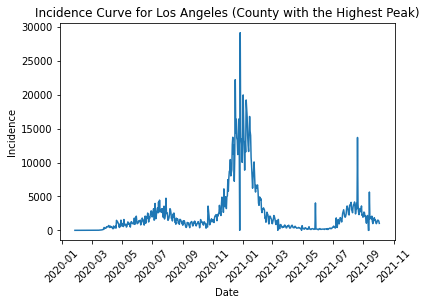

In [184]:
df_la = df[df['fips'] == 6037.0]
df_la = df_la.drop(columns = ['county', 'state', 'fips', 'deaths'])
df_la = df_la.groupby(['date']).max()
df_la_increments = df_la.diff().rename(columns = {'cases':'incident'})
plt.plot(df_la_increments)
plt.title("Incidence Curve for Los Angeles (County with the Highest Peak)")
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Incidence')

#### Question 6: Plot a vertical bar graph with County as the category and the peak incidence as the measure.

In [193]:
df6 = df4.drop(columns = ['state', 'fips', 'date', 'new_deaths'])
df6

,county,incident
282,Cook,6697.0
1167,Dallas,6162.0
1392,Harris,14129.0
2105,Los Angeles,29174.0
2730,Maricopa,11761.0
3524,Miami-Dade,21655.0
3921,Orange,9584.0
4505,Riverside,8341.0
5046,San Bernardino,8026.0
5845,San Diego,15453.0


Text(0, 0.5, 'Incidence')

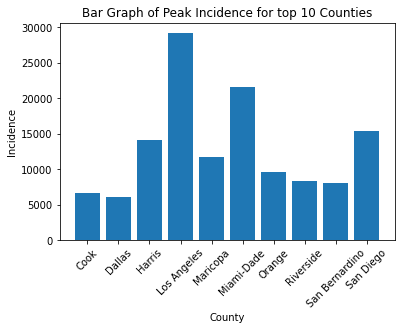

In [195]:
plt.bar(x = df6['county'], height = df6['incident'])
plt.title("Bar Graph of Peak Incidence for top 10 Counties")
plt.xlabel('County')
plt.xticks(rotation = 45)
plt.ylabel('Incidence')